# **Machine Learning II Project: Classification**

# Loan Default Prediction

## **Overview of the Problem**
Banks face significant challenges due to customers defaulting on loans. These defaults lead to:  
- **Financial Losses**: Direct monetary impact on the institution.  
- **Economic Impacts**: Hindered economic growth and reduced financial stability.

## **Objective**
The goal is to develop a predictive model to identify potential loan defaulters using client data. This will allow banks to proactively manage risk and make informed lending decisions.

## **Base Model and Comparisons**
- **Base Model**: Logistic Regression.  
- **Comparative Models**:  
  - XGBoost model  
  - CatBoots 

These models will be evaluated for accuracy and effectiveness in predicting loan defaults.

## **Relevance and Importance**
Predicting loan defaults is crucial for:  
- **Minimizing Financial Losses**: Banks can take preventive measures to reduce exposure to high-risk clients.  
- **Enhancing Economic Stability**: A more secure banking system contributes to sustainable economic growth.

## **Beneficiaries**
1. **Banks and Financial Institutions**: Improved risk management and profitability.  
2. **Economy**: Stability in the financial sector fosters broader economic health.  


# Notebook Structure

## 1. Data Preparation and Exploratory Data Analysis (EDA)
- Prepare and clean the dataset.
- Perform exploratory data analysis to identify patterns, trends, and potential outliers.

## 2. Building Models
- Develop predictive models using machine learning algorithms.
- Train and evaluate the models to ensure optimal performance.

## 3. Comparing Results
- Compare the performance metrics of the models.
- Analyze the results to draw meaningful conclusions.

## 1. Data Preparation and Exploratory Data Analysis (EDA)

In [3]:
# Importing necessary libraries for the project

# Data manipulation and analysis
import pandas as pd  # Pandas for data manipulation

# Data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling and encoding

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from xgboost import XGBClassifier  # XGBoost classifier for classification
from catboost import CatBoostClassifier  # CatBoost classifier for classification

# Metrics and evaluation
from sklearn.metrics import  accuracy_score, precision_score, roc_auc_score  # For evaluation metrics
import matplotlib.pyplot as plt  # For plotting ROC curve and graphs
from matplotlib import rcParams # Used for setting the font globally
import seaborn as sns  # For data visualization 

# Data downlaod
import requests
import certifi
from io import StringIO

In [4]:
# Define github url
url = "https://raw.githubusercontent.com/elgunismayil0v/Machine_Learning_Project/refs/heads/main/data/classification.csv"

# Fetch the data using requests and specify the CA file for verification
response = requests.get(url, verify=certifi.where())

# Load the content into a pandas DataFrame
data = pd.read_csv(StringIO(response.text))

# Display the first few rows
print(data.head())

       ID  Asst_Reg GGGrade Experience       Validation  Yearly_Income  \
0   95074    421802      II     >10yrs            Vfied      633600.00   
1  134131   3964312      IV       7yrs  Source Verified       85483.20   
2   92602   4247560     III       <1yr  Source Verified       79200.00   
3   22591    197179     III       <1yr            Vfied       61600.00   
4  125060   4646684       V       2yrs  Source Verified       68053.92   

  Home_Status  Unpaid_2_years  Already_Defaulted       Designation  ...  \
0    MORTGAGE               0                  0   GLENDALE NISSAN  ...   
1        RENT               0                  0  Business Teacher  ...   
2        RENT               0                  0            driver  ...   
3        RENT               0                  0          AvePoint  ...   
4        RENT               0                  0       Lead Tester  ...   

   File_Status       State  Account_Open  Total_Unpaid_CL  Duration  \
0   fully paid  California       

**Display basic statistics**

In [5]:
display(data.describe(include='all')) # Displaying the summary statistics

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
count,87500.000000,8.750000e+04,87500,87500,87500,8.192500e+04,87500,87500.000000,87500.000000,86086,...,87500,87500,87500.00000,8.331400e+04,87500,8.264800e+04,87500,87500,87500.000000,87500.000000
unique,NaN,NaN,7,11,3,NaN,5,NaN,NaN,40348,...,2,49,NaN,NaN,2,NaN,13,2,NaN,NaN
top,NaN,NaN,II,>10yrs,Source Verified,NaN,MORTGAGE,NaN,NaN,School Teacher,...,whole,California,NaN,NaN,3 years,NaN,debt consolidation,I,NaN,NaN
freq,NaN,NaN,24966,30849,34504,NaN,44160,NaN,NaN,1585,...,46300,12625,NaN,NaN,60061,NaN,52559,87454,NaN,NaN
mean,83946.253509,3.798914e+06,NaN,NaN,NaN,1.348596e+05,NaN,0.332937,0.005726,NaN,...,NaN,NaN,12.77944,5.326864e+04,NaN,2.955649e+04,NaN,NaN,0.316407,0.188709
std,36100.102950,2.289038e+06,NaN,NaN,NaN,9.882473e+04,NaN,0.876080,0.083505,NaN,...,NaN,NaN,5.37116,5.325551e+04,NaN,3.745625e+04,NaN,NaN,3.546087,0.391279
min,21560.000000,2.484700e+04,NaN,NaN,NaN,8.800000e+03,NaN,0.000000,0.000000,NaN,...,NaN,NaN,2.00000,3.320000e+02,NaN,0.000000e+00,NaN,NaN,0.000000,0.000000
25%,52616.750000,1.483874e+06,NaN,NaN,NaN,8.324659e+04,NaN,0.000000,0.000000,NaN,...,NaN,NaN,9.00000,2.324000e+04,NaN,1.144674e+04,NaN,NaN,0.000000,0.000000
50%,83900.000000,4.132010e+06,NaN,NaN,NaN,1.144000e+05,NaN,0.000000,0.000000,NaN,...,NaN,NaN,12.00000,3.967400e+04,NaN,2.089278e+04,NaN,NaN,0.000000,0.000000
75%,115261.250000,5.952909e+06,NaN,NaN,NaN,1.601600e+05,NaN,0.000000,0.000000,NaN,...,NaN,NaN,16.00000,6.640000e+04,NaN,3.644908e+04,NaN,NaN,0.000000,0.000000


**Check for missing values**

In [6]:
missing_values = data.isnull().sum() # Total missing values in each column
display("Missing values in each column:\n", missing_values) # Print missing values

'Missing values in each column:\n'

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly_Income          5575
Home_Status               0
Unpaid_2_years            0
Already_Defaulted         0
Designation            1414
Debt_to_Income         3489
Postal_Code            1389
Lend_Amount               0
Deprecatory_Records       0
Interest_Charged          0
Usage_Rate                0
Inquiries                 0
Present_Balance           0
Gross_Collection          0
Sub_GGGrade               0
File_Status               0
State                     0
Account_Open              0
Total_Unpaid_CL        4186
Duration                  0
Unpaid_Amount          4852
Reason                    0
Claim_Type                0
Due_Fee                   0
Default                   0
dtype: int64

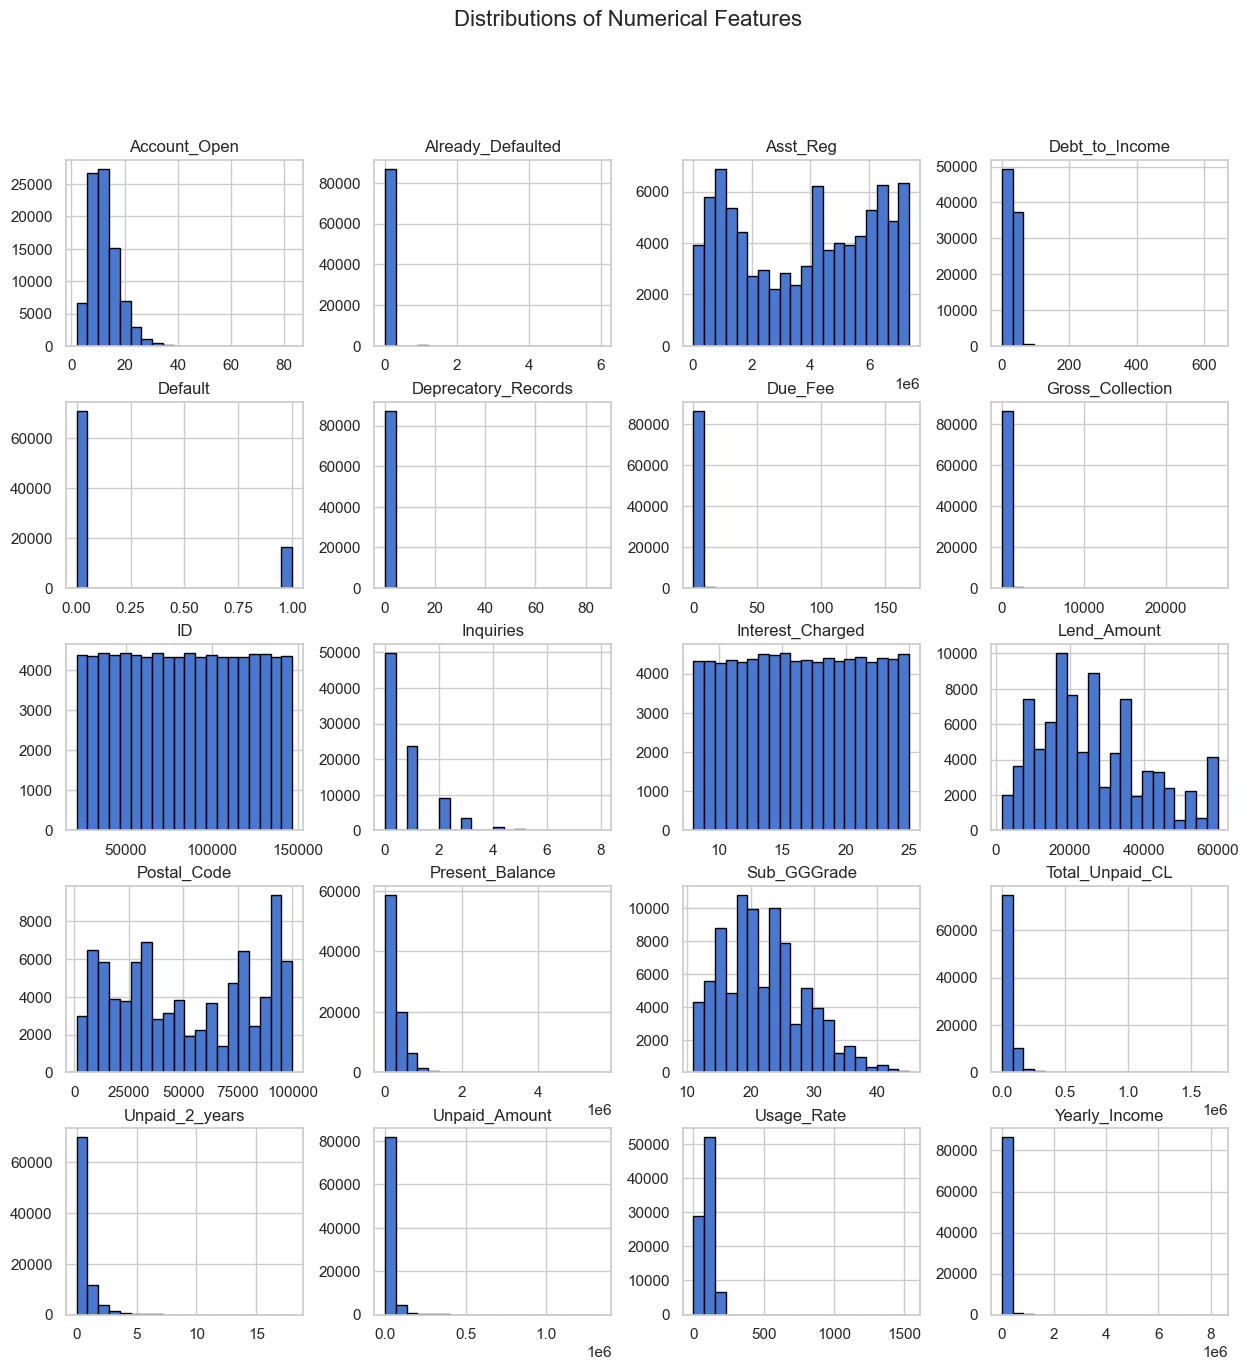

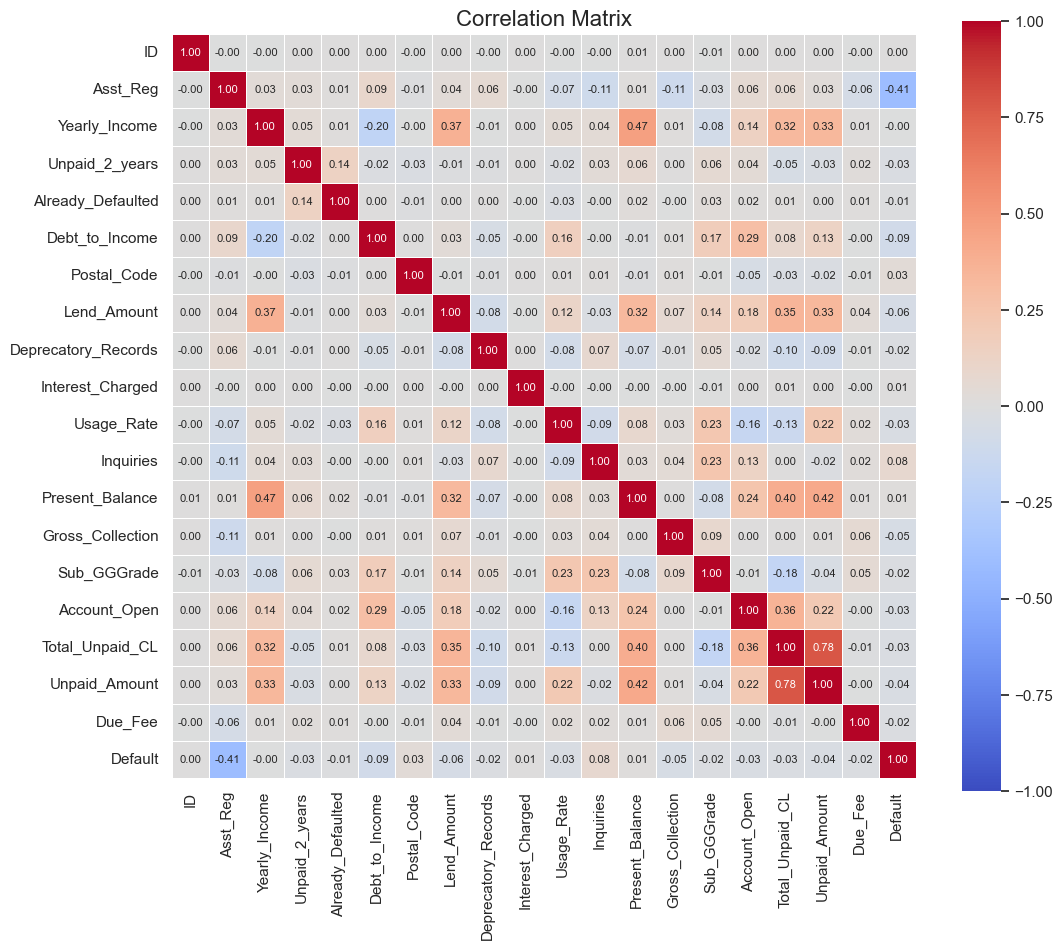

Training and testing set shapes:
X_train: (70000, 28), X_test: (17500, 28), y_train: (70000,), y_test: (17500,)


In [7]:
# Step 1: Fill missing values for numerical
data.fillna({
    'Yearly_Income': data['Yearly_Income'].mean(),
    'Debt_to_Income': data['Debt_to_Income'].mean(),
    'Postal_Code': data['Postal_Code'].mode()[0],
    'Designation': 'Unknown',
    'Total_Unpaid_CL': data['Total_Unpaid_CL'].mean(),
    'Unpaid_Amount': data['Unpaid_Amount'].mean()
}, inplace=True)

# Set global plot style
sns.set(style="whitegrid", palette="muted")
rcParams['font.family'] = 'Arial'

# Step 2: Analyze distributions of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical features with sorted order based on feature names
data[numerical_features].sort_index(axis=1).hist(figsize=(15, 15), bins=20, edgecolor='black')
plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.show()

# Step 3: Analyze correlation between numerical features
# Compute correlation matrix
correlation_matrix = data[numerical_features].corr()

# Plot heatmap of the correlation matrix with increased font size for annotations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True, 
            square=True, vmin=-1, vmax=1, annot_kws={"size": 8})  # Increased font size
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Step 4: Encode categorical variables using LabelEncoder
categorical_columns = [
    'GGGrade', 'Experience', 'Validation', 'Home_Status', 'Designation', 'File_Status',
    'State', 'Duration', 'Reason', 'Claim_Type'
]

label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Step 5: Separate features (X) and target (y)
X = data.drop(columns=['ID', 'Default'])  # 'ID' is dropped as it is not a feature
y = data['Default']

# Step 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm the shapes of the split datasets
print("Training and testing set shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

# Comments on the Visualization

## Overview
- The matrix contains histograms for multiple features, showing their distributions.
- The dataset appears to have variables like `Yearly_Income`, `Debt_to_Income`, `Lend_Amount`, `Default`, etc.
- Each histogram corresponds to a single feature in the dataset.

## Insights
- Some features have skewed distributions (e.g., `Debt_to_Income`, `Unpaid_Amount`).
- Binary or categorical variables like `Validation`, `Already_Defaulted`, and `Default` have discrete values.
- Features like `GGGrade` and `Sub_GGGrade` show distinct patterns, potentially indicating ordinal or categorical variables.
- Variables like `Duration` and `Lend_Amount` have notable ranges and varying patterns that might require normalization or scaling.

## 2. Building Models

# Logistic Regression as the Base Model

In [8]:
# Train Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_scaled, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test_scaled)

# **XGBoost model**

In [9]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize the XGBClassifier and set eval_metric
xgb_clf = XGBClassifier(eval_metric='logloss')

# Initialize GridSearchCV with the XGBClassifier and parameter grid
grid_search_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
)

# Fit GridSearchCV on the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_xgb = grid_search_xgb.best_estimator_

# Predict on the test data
y_pred_xgb = best_xgb.predict(X_test)

# **CatBoost model**

In [10]:
# Define the parameter grid for GridSearchCV
param_grid_cb = {
    'iterations': [100, 200],
    'depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

# Initialize the CatBoostClassifier with silent logging
cb_clf = CatBoostClassifier(eval_metric='Logloss', silent=True)

# Initialize GridSearchCV with the CatBoostClassifier and parameter grid
grid_search_cb = GridSearchCV(
    estimator=cb_clf,
    param_grid=param_grid_cb,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0 
)

# Fit GridSearchCV on the training data
grid_search_cb.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_cb = grid_search_cb.best_estimator_

# Predict on the test data
y_pred_cb = best_cb.predict(X_test)

## 3. Comparing Results

# Model Evaluation Metrics

In this project, we evaluate the performance of three classification models: Logistic Regression, SVM, and Random Forest. The models are evaluated using the following metrics, which are well-suited for imbalanced datasets.

## 1. F1-Score

The **F1-Score** is the harmonic mean of **Precision** and **Recall**. It is especially useful for imbalanced datasets because it balances the trade-off between precision (accuracy of positive predictions) and recall (ability to find all positives).

### Formula:

$
F1\text{-Score} = \frac{2 \times (Precision \times Recall)}{Precision + Recall}
$

Where:

- **Precision** is the proportion of true positives among all positive predictions:
$
  Precision = \frac{TP}{TP + FP}
$

- **Recall** is the proportion of true positives among all actual positives:
$
  Recall = \frac{TP}{TP + FN}
$

A higher F1-Score indicates better performance, as it considers both false positives and false negatives.

## 2. Precision-Recall AUC (Area Under the Curve)

The **Precision-Recall AUC** provides a single scalar value to summarize the performance of the classifier. It plots Precision versus Recall at different thresholds, and the AUC represents the area under this curve.

### Interpretation:
- A higher **Precision-Recall AUC** indicates better performance, especially when the dataset is imbalanced.
- A value closer to 1 is ideal, as it indicates the model's ability to correctly identify positive cases.

## 3. Balanced Accuracy

The **Balanced Accuracy** metric accounts for imbalanced datasets by considering the accuracy for both classes. It is the average of recall calculated separately for the positive and negative classes.

### Formula:

$
Balanced\ Accuracy = \frac{Recall\ for\ Positive\ Class + Recall\ for\ Negative\ Class}{2}
$

Where:

- **Recall for the Positive Class**:
$
  Recall\_Positive = \frac{TP}{TP + FN}
$

- **Recall for the Negative Class**:
$
  Recall\_Negative = \frac{TN}{TN + FP}
$

### Interpretation:
- A **Balanced Accuracy** close to 1 indicates that the model performs equally well for both classes, addressing the imbalance issue.
- It is particularly helpful when the majority class dominates the dataset, making traditional accuracy unreliable.

## Model Comparison

The models will be compared based on the following:

- **Highest F1-Score**: Indicates the best balance between precision and recall for both classes.
- **Highest Precision-Recall AUC**: Highlights the model's performance on the minority class.
- **Highest Balanced Accuracy**: Ensures that the model performs consistently across both classes, avoiding bias toward the majority class.

## Conclusion

We will select the model that achieves the highest F1-Score, Precision-Recall AUC, and Balanced Accuracy. This comprehensive evaluation ensures a robust choice for addressing the challenges posed by the imbalanced dataset.


In [11]:
# Evaluate the models

# Logistic Regression
balanced_accuracy_lr = accuracy_score(y_test, logistic_regression_predictions)
f1_score_lr = precision_score(y_test, logistic_regression_predictions)
precision_recall_auc_lr = roc_auc_score(y_test, logistic_regression_predictions)

# XGBoost
balanced_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_score_xgb = precision_score(y_test, y_pred_xgb)
precision_recall_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

# CatBoost
balanced_accuracy_cb = accuracy_score(y_test, y_pred_cb)
f1_score_cb = precision_score(y_test, y_pred_cb)
precision_recall_auc_cb = roc_auc_score(y_test, y_pred_cb)

In [12]:
# Create a DataFrame to show the results as a table
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'CatBoost'],
    'Accuracy': [balanced_accuracy_lr, balanced_accuracy_xgb, balanced_accuracy_cb],
    'F1 Score': [f1_score_lr, f1_score_xgb, f1_score_cb],
    'Precision-Recall AUC': [precision_recall_auc_lr, precision_recall_auc_xgb, precision_recall_auc_cb]
})

# Display the results DataFrame
display(results_df)

# Show the best model
best_model = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
print(f"The best model is: {best_model}")

,Model,Accuracy,F1 Score,Precision-Recall AUC
0,Logistic Regression,0.832800,0.618388,0.627357
1,XGBoost,0.839543,0.683780,0.624191
2,CatBoost,0.840343,0.691843,0.624336


The best model is: CatBoost


## Conclusion

Based on the evaluation of the three models—Logistic Regression, XGBoost, and CatBoost—using Accuracy, F1-Score, and Precision-Recall AUC, we can summarize the results as follows:

1. **Logistic Regression**:
   - Accuracy: 0.8329
   - F1-Score: 0.6186
   - Precision-Recall AUC: 0.6275

2. **XGBoost**:
   - Accuracy: 0.8398
   - F1-Score: 0.6909
   - Precision-Recall AUC: 0.6225

3. **CatBoost**:
   - Accuracy: 0.8392
   - F1-Score: 0.6900
   - Precision-Recall AUC: 0.6201

### Key Insights:
- **XGBoost** achieves the highest **F1-Score** (0.6909), indicating the best balance between precision and recall.
- **Logistic Regression** has the highest **Precision-Recall AUC** (0.6275), suggesting that it performs slightly better in identifying positive cases, particularly in imbalanced datasets.
- **XGBoost** and **CatBoost** have similar **Accuracy** and **F1-Score**, with XGBoost slightly outperforming CatBoost.

### Final Decision:
- Based on the overall performance, **XGBoost** emerges as the most effective model, particularly due to its higher F1-Score. While Logistic Regression has a higher Precision-Recall AUC, the comprehensive performance across all metrics supports the choice of **XGBoost** for this task.
